In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_positions(region_size, num_nodes):
    return np.random.rand(num_nodes, 2) * region_size

In [3]:
def calculate_distances(anchors, unknown_nodes):
    distances = np.linalg.norm(anchors[:, None, :] - unknown_nodes[None, :, :], axis=2)
    return distances.T

In [4]:
def elm_train(input_data, target_data, hidden_neurons):
    input_weights = np.random.randn(hidden_neurons, input_data.shape[1])
    biases = np.random.randn(hidden_neurons)
    H = np.tanh(np.dot(input_data, input_weights.T) + biases)
    output_weights = np.linalg.pinv(H).dot(target_data)
    return input_weights, biases, output_weights

In [5]:
def elm_predict(input_data, input_weights, biases, output_weights):
    H = np.tanh(np.dot(input_data, input_weights.T) + biases)
    predictions = np.dot(H, output_weights)
    return predictions

In [6]:
def localization_simulation(region_size, num_unknowns, anchor_configs, hidden_neurons):
    results = []
    unknown_nodes = generate_positions(region_size, num_unknowns)
    for num_anchors in anchor_configs:
        anchors = generate_positions(region_size, num_anchors)
        distances = calculate_distances(anchors, unknown_nodes)
        input_data = distances
        target_data = unknown_nodes

        input_weights, biases, output_weights = elm_train(input_data, target_data, hidden_neurons)
        predictions = elm_predict(input_data, input_weights, biases, output_weights)

        errors = np.linalg.norm(predictions - target_data, axis=1)
        ale = np.mean(errors)
        results.append((anchors, predictions, ale))
    return results, unknown_nodes

In [7]:
def plot_results(region_size, unknown_nodes, results, anchor_configs):
    fig, axs = plt.subplots(2, 2, figsize=(12, 12))
    axs = axs.ravel()
    for i, (anchors, predictions, ale) in enumerate(results):
        ax = axs[i]
        for j in range(len(unknown_nodes)):
            ax.plot([unknown_nodes[j, 0], predictions[j, 0]],
                    [unknown_nodes[j, 1], predictions[j, 1]], 'b--', linewidth=0.5)
        ax.scatter(unknown_nodes[:, 0], unknown_nodes[:, 1], c='black', label='True Node Location', s=20, marker='o')
        ax.scatter(predictions[:, 0], predictions[:, 1], c='blue', label='Estimated Node Location', s=20, marker='^')
        ax.scatter(anchors[:, 0], anchors[:, 1], c='red', label='Anchor Locations', s=40, marker='o')
        ax.set_xlim(0, region_size)
        ax.set_ylim(0, region_size)
        ax.set_title(f"N = {anchor_configs[i]}\nALE = {ale:.4f}")
        ax.set_xlabel("X-Position (in meters)")
        ax.set_ylabel("Y-Position (in meters)")
        ax.legend()
    plt.tight_layout()
    plt.show()

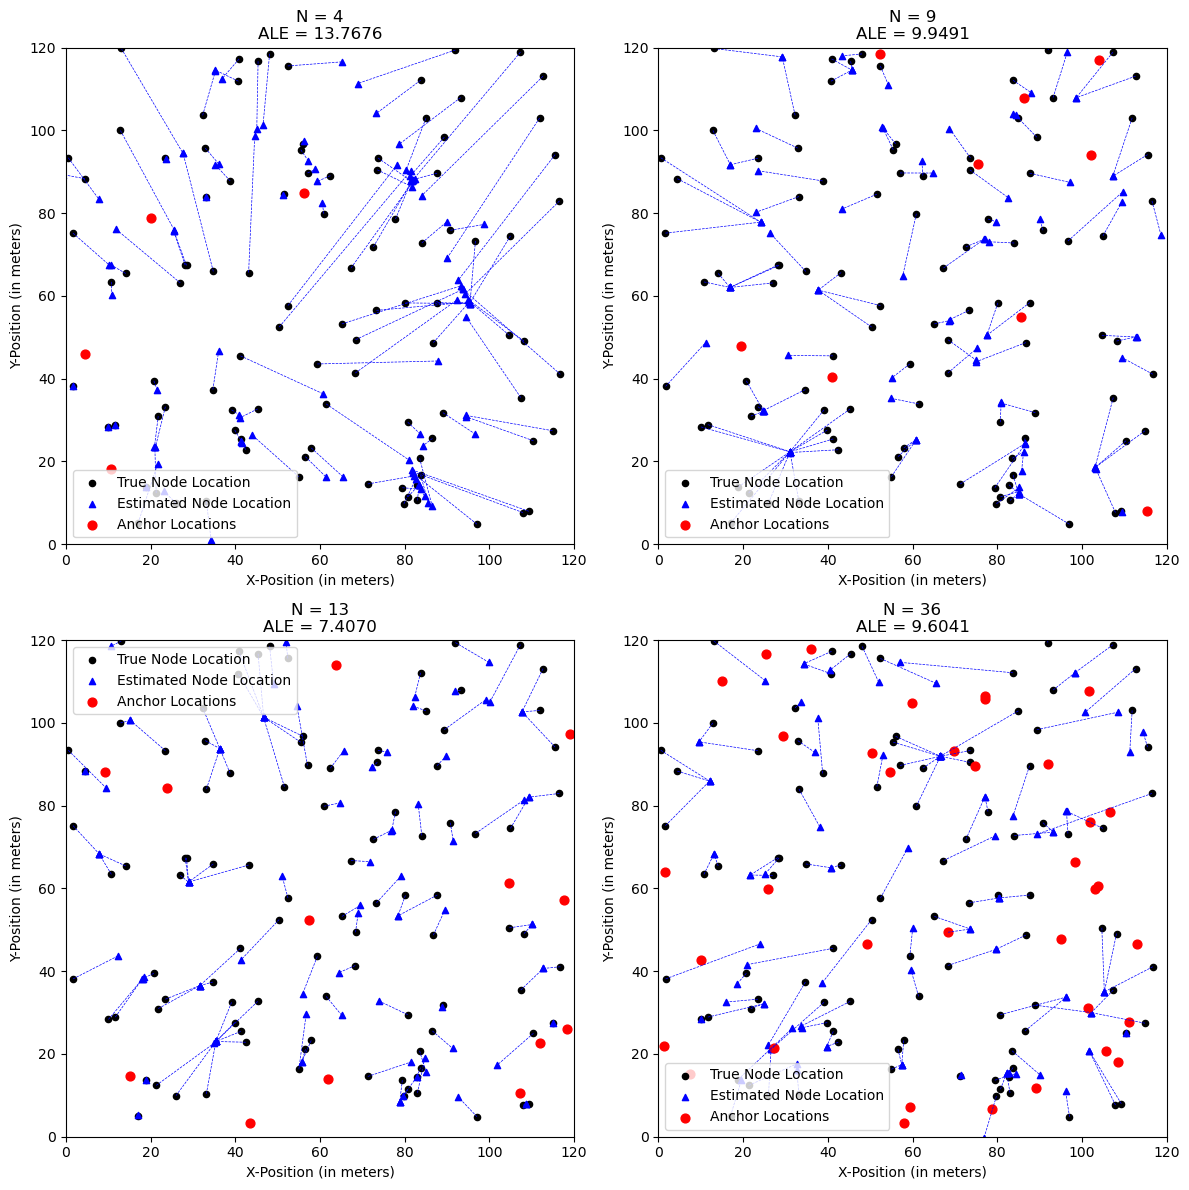

In [8]:
region_size = 120
num_unknowns = 100
anchor_configs = [4, 9, 13, 36]
hidden_neurons = 50

results, unknown_nodes = localization_simulation(region_size, num_unknowns, anchor_configs, hidden_neurons)

plot_results(region_size, unknown_nodes, results, anchor_configs)